In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
csv_path = "../outputs/metrics/unet_metrics.csv"   # change to your path
df = pd.read_csv(csv_path)

In [5]:
df


,epoch,train_loss,val_loss,val_dice,val_iou,val_accuracy
0,0,0.3600,0.3677,0.7284,0.6587,0.9590
1,1,0.2236,0.3216,0.7078,0.6389,0.9519
2,2,0.1811,0.2510,0.7999,0.7421,0.9763
3,3,0.1657,0.2377,0.8159,0.7600,0.9781
4,4,0.1532,0.1564,0.8110,0.7570,0.9791
5,5,0.1378,0.1426,0.8186,0.7625,0.9757
6,6,0.1230,0.1161,0.8448,0.7928,0.9806
7,7,0.1198,0.1330,0.8301,0.7774,0.9793
8,8,0.1106,0.1132,0.8516,0.7999,0.9811
9,9,0.1050,0.1201,0.8440,0.7938,0.9821


In [6]:
df["epoch"] = df["epoch"].astype(int)
df = df.sort_values("epoch").reset_index(drop=True)


In [7]:
best_idx = df["val_iou"].idxmax()
best_row = df.loc[best_idx]
print("Best epoch (by Val IoU):", int(best_row["epoch"]))
print(best_row)

Best epoch (by Val IoU): 17
epoch           17.0000
train_loss       0.0927
val_loss         0.1064
val_dice         0.8709
val_iou          0.8237
val_accuracy     0.9850
Name: 17, dtype: float64


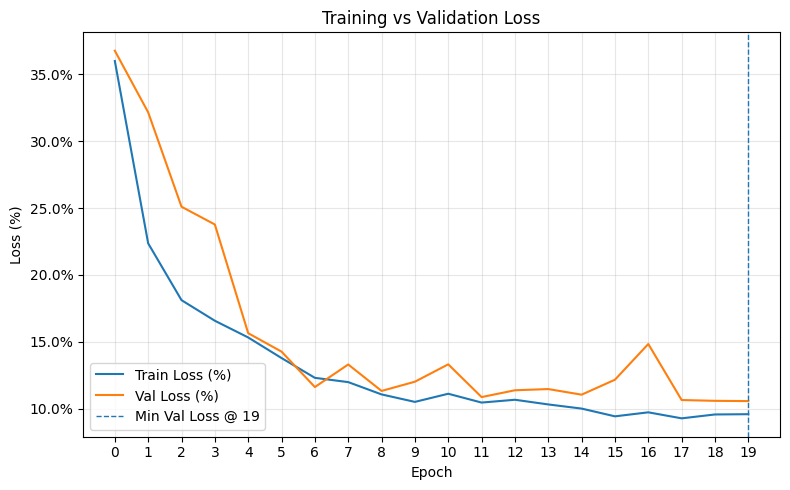

In [11]:

from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["train_loss"] * 100, label="Train Loss (%)")
plt.plot(df["epoch"], df["val_loss"] * 100, label="Val Loss (%)")

# ---- best epoch (minimum val loss) ----
best_val_epoch = df.loc[df["val_loss"].idxmin(), "epoch"]
plt.axvline(
    best_val_epoch,
    linestyle="--",
    linewidth=1,
    label=f"Min Val Loss @ {best_val_epoch}"
)

plt.xlabel("Epoch")
plt.ylabel("Loss (%)")
plt.title("Training vs Validation Loss")

# Integer epochs
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))

# Percentage formatting ONLY (no forced limits)
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


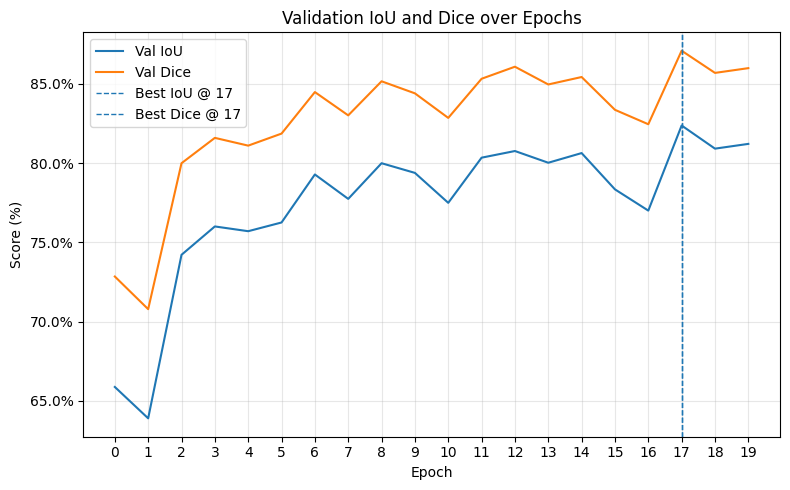

In [13]:
plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["val_iou"], label="Val IoU")
plt.plot(df["epoch"], df["val_dice"], label="Val Dice")

best_iou_epoch = df.loc[df["val_iou"].idxmax(), "epoch"]
best_dice_epoch = df.loc[df["val_dice"].idxmax(), "epoch"]

plt.axvline(best_iou_epoch, linestyle="--", linewidth=1, label=f"Best IoU @ {best_iou_epoch}")
plt.axvline(best_dice_epoch, linestyle="--", linewidth=1, label=f"Best Dice @ {best_dice_epoch}")

plt.xlabel("Epoch")
plt.ylabel("Score (%)")
plt.title("Validation IoU and Dice over Epochs")

# ---- FIXES ----
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
# ----------------

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


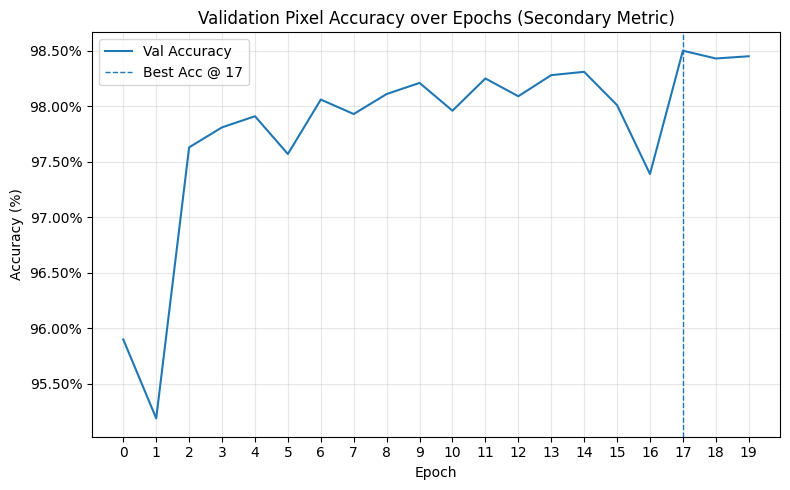

In [14]:

from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["val_accuracy"], label="Val Accuracy")

# ---- best epoch (maximum accuracy) ----
best_acc_epoch = df.loc[df["val_accuracy"].idxmax(), "epoch"]
plt.axvline(
    best_acc_epoch,
    linestyle="--",
    linewidth=1,
    label=f"Best Acc @ {best_acc_epoch}"
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Validation Pixel Accuracy over Epochs (Secondary Metric)")

# ---- FIXES ----
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
# ----------------

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
